<a href="https://colab.research.google.com/github/Riya-Singh-cell/Machine_Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DMV_Written_Tests.csv to DMV_Written_Tests (4).csv


In [ ]:
df = pd.read_csv('DMV_Written_Tests.csv')
print("The 1st 5 lines")
display(df.head())
print("Info")
df.info()
print("Number of null values:")
print(df.isnull().sum())

The 1st 5 lines


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
Number of null values:
DMV_Test_1    0
DMV_Test_2    0
Results       0
dtype: int64


### Task 3: Visualize the Data
---

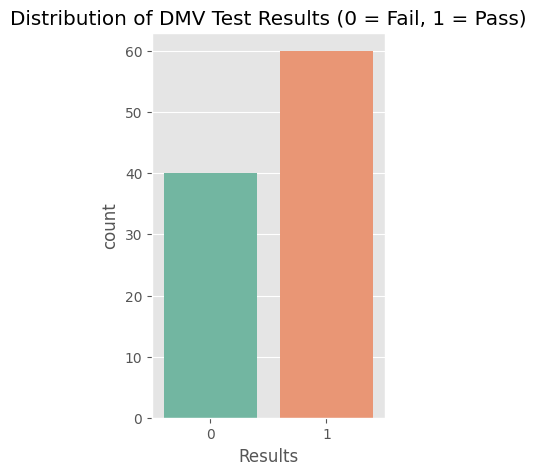

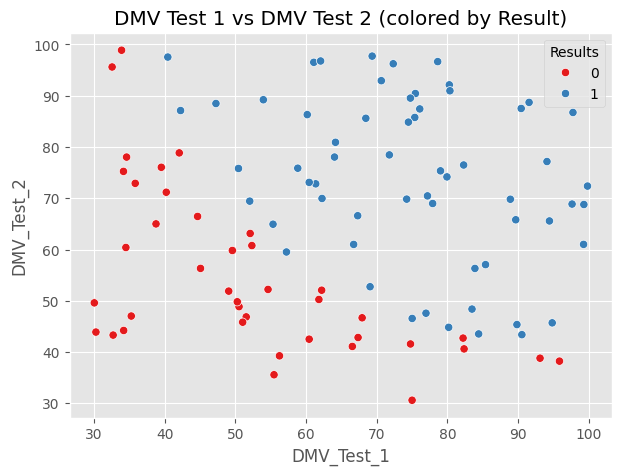

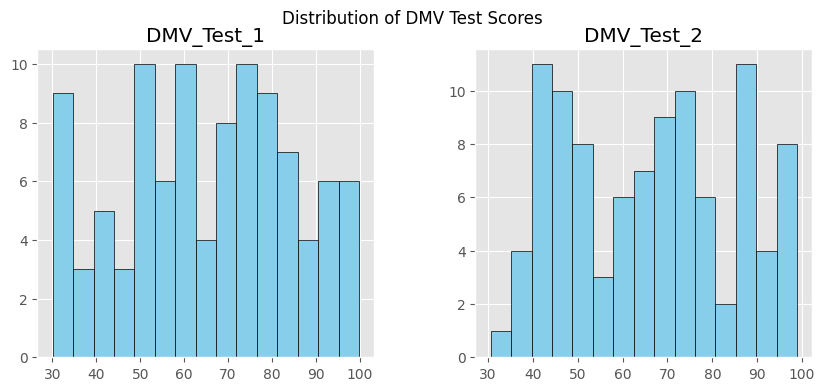

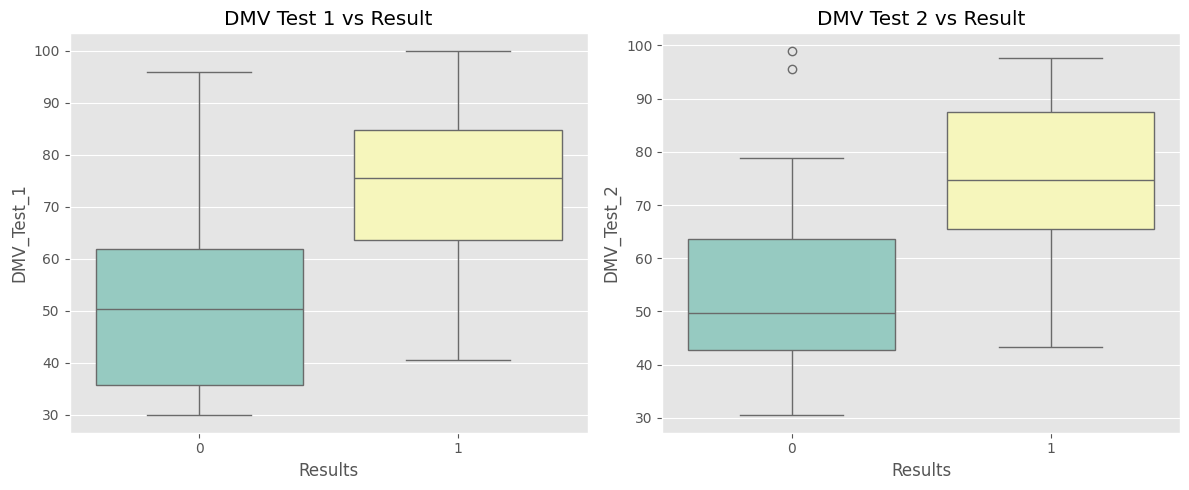

In [ ]:
# Task 3: Visualize the Data (Clean Version)

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribution of Target Variable (Results)
plt.figure(figsize=(3,5))
sns.countplot(x="Results", hue="Results", data=df, palette="Set2", legend=False)
plt.title("Distribution of DMV Test Results (0 = Fail, 1 = Pass)")
plt.show()
print("\n")

# 2. Scatterplot of DMV_Test_1 vs DMV_Test_2 colored by Results
plt.figure(figsize=(7,5))
sns.scatterplot(x="DMV_Test_1", y="DMV_Test_2", hue="Results", data=df, palette="Set1")
plt.title("DMV Test 1 vs DMV Test 2 (colored by Result)")
plt.show()
print("\n")

# 3. Histograms of Feature Distributions
df[["DMV_Test_1", "DMV_Test_2"]].hist(figsize=(10,4), bins=15, color="skyblue", edgecolor="black")
plt.suptitle("Distribution of DMV Test Scores")
plt.show()
print("\n")

# 4. Boxplots: Compare Feature Distributions by Result
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x="Results", y="DMV_Test_1", data=df, hue="Results", palette="Set3", legend=False)
plt.title("DMV Test 1 vs Result")

plt.subplot(1,2,2)
sns.boxplot(x="Results", y="DMV_Test_2", data=df, hue="Results", palette="Set3", legend=False)
plt.title("DMV Test 2 vs Result")

plt.tight_layout()
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

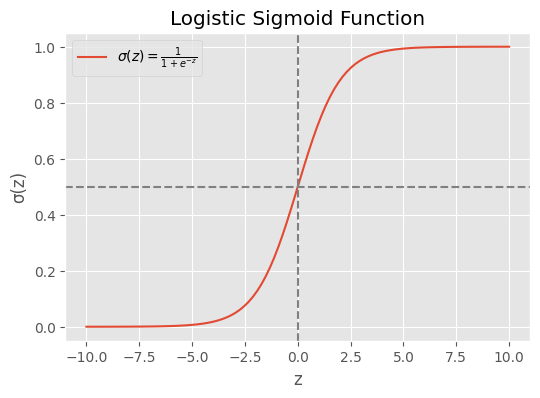

In [ ]:
# Logistic Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Example: test the function with some values
z_values = np.linspace(-10, 10, 100)   # values from -10 to 10
sigmoid_values = sigmoid(z_values)

# Plot the sigmoid curve
plt.figure(figsize=(6,4))
plt.plot(z_values, sigmoid_values, label=r'$\sigma(z) = \frac{1}{1+e^{-z}}$')
plt.axhline(0.5, color='gray', linestyle='--')  # threshold line
plt.axvline(0, color='gray', linestyle='--')
plt.title("Logistic Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.legend()
plt.show()


### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [ ]:
# Sigmoid function (already defined earlier, but redefining here for clarity)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function J(theta)
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))  # hypothesis = sigmoid(Xθ)
    epsilon = 1e-5  # small value to avoid log(0)
    cost = -(1/m) * np.sum(y*np.log(h+epsilon) + (1-y)*np.log(1-h+epsilon))
    return cost

# Gradient of the cost function
def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = (1/m) * np.dot(X.T, (h - y))
    return gradient

### Task 6: Cost and Gradient at Initialization
---

In [ ]:
# --- Sigmoid ---
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# --- Cost (Log-Loss / Cross-Entropy) ---
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    eps = 1e-8  # guard against log(0)
    return -(1/m) * np.sum(y*np.log(h + eps) + (1-y)*np.log(1 - h + eps))

# --- Gradient ---
def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (1/m) * (X.T @ (h - y))

# Build X with bias term; y as target
X = df[["DMV_Test_1", "DMV_Test_2"]].to_numpy()
m = X.shape[0]
X = np.hstack([np.ones((m, 1)), X])  # add bias column of 1s
y = df["Results"].to_numpy()

# Initialize theta = 0
theta_init = np.zeros(X.shape[1])

# Compute initial cost and gradient
initial_cost = compute_cost(theta_init, X, y)
initial_grad = compute_gradient(theta_init, X, y)

print("Initial cost J(theta=0):", initial_cost)
print("Initial gradient at theta=0:", initial_grad)


Initial cost J(theta=0): 0.6931471605599454
Initial gradient at theta=0: [ -0.1        -12.00921659 -11.26284221]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

epoch    0 | cost 0.693147
epoch  200 | cost 0.243028
epoch  400 | cost 0.207802
epoch  600 | cost 0.193789
epoch  800 | cost 0.186253
epoch 1000 | cost 0.181604
epoch 1200 | cost 0.178496
epoch 1400 | cost 0.176307
epoch 1600 | cost 0.174707
epoch 1800 | cost 0.173503
epoch 1999 | cost 0.172583

Final θ shape: (3,)
Train Accuracy: 0.9125
Test  Accuracy: 0.8000


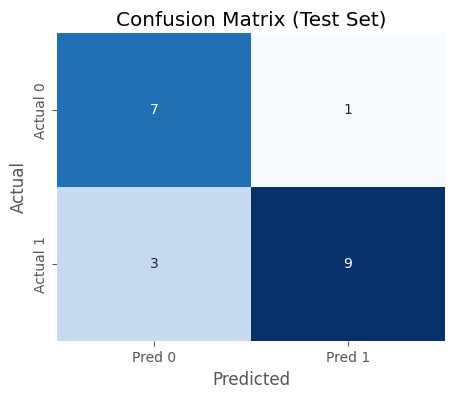

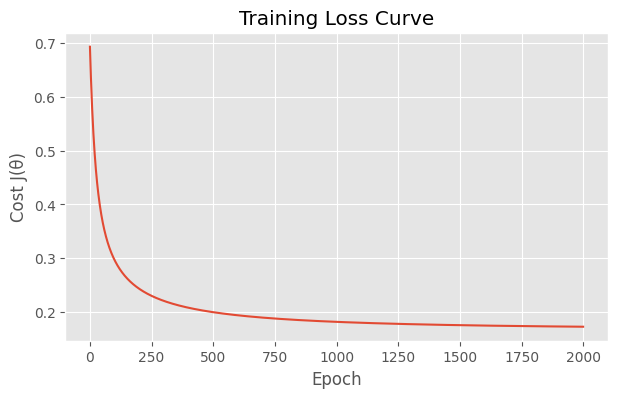

In [ ]:
# ===== Task 7: Logistic Regression with Gradient Descent, Train/Test Split & Confusion Matrix =====

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# -----------------------------
# Helper functions
# -----------------------------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def add_intercept(X):
    """Add intercept column (1s) to feature matrix"""
    return np.c_[np.ones((X.shape[0], 1)), X]

def predict(theta, X):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def cost_and_grad(theta, X, y):
    """Compute cost J(θ) and gradient ∂J/∂θ"""
    m = len(y)
    h = sigmoid(X @ theta)
    J = -(1/m) * (y @ np.log(h + 1e-15) + (1-y) @ np.log(1-h + 1e-15))
    grad = (1/m) * (X.T @ (h - y))
    return J, grad

def standardize(X, mean_=None, std_=None):
    """Standardize features"""
    if mean_ is None: mean_ = X.mean(axis=0)
    if std_  is None: std_  = X.std(axis=0)
    return (X-mean_)/std_, mean_, std_

feature_cols = [c for c in df.columns if c != "Results"]
X = df[feature_cols].to_numpy(dtype=float)
y = df["Results"].to_numpy().astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
X_train, mean_, std_ = standardize(X_train)
X_test, _, _ = standardize(X_test, mean_, std_)

# Add intercept
X_train = add_intercept(X_train)
X_test  = add_intercept(X_test)

# -----------------------------
# Gradient Descent
# -----------------------------
lr     = 0.1      # learning rate
epochs = 2000
tol    = 1e-6

theta = np.zeros(X_train.shape[1])
history_loss = []
prev_J = None

for ep in range(epochs):
    J, grad = cost_and_grad(theta, X_train, y_train)
    theta -= lr * grad
    history_loss.append(J)

    if prev_J is not None and abs(prev_J - J) < tol:
        print(f"Converged at epoch {ep}, cost={J:.6f}")
        break
    prev_J = J

    if ep % 200 == 0 or ep == epochs - 1:
        print(f"epoch {ep:4d} | cost {J:.6f}")

# -----------------------------
# Evaluation
# -----------------------------
yhat_train = predict(theta, X_train)
yhat_test  = predict(theta, X_test)

print("\nFinal θ shape:", theta.shape)
print(f"Train Accuracy: {accuracy(y_train, yhat_train):.4f}")
print(f"Test  Accuracy: {accuracy(y_test, yhat_test):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, yhat_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0","Pred 1"],
            yticklabels=["Actual 0","Actual 1"])
plt.title("Confusion Matrix (Test Set)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()
print("\n")

# Loss Curve
plt.figure(figsize=(7,4))
plt.plot(history_loss)
plt.xlabel("Epoch")
plt.ylabel("Cost J(θ)")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()


### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

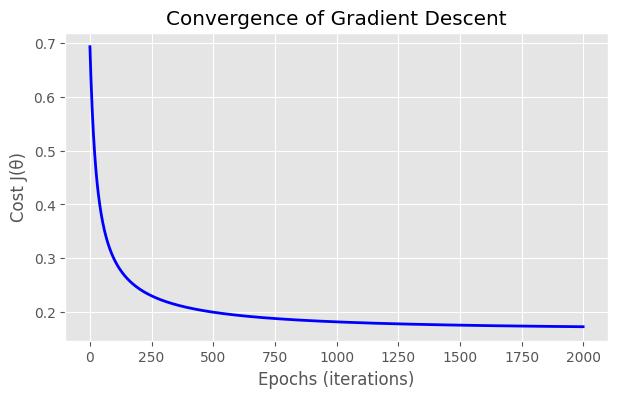

In [ ]:
# ===== Task 8: Plotting the Convergence of J(θ) =====

import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.plot(range(len(history_loss)), history_loss, color="blue", linewidth=2)

plt.xlabel("Epochs (iterations)")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Gradient Descent")
plt.grid(True)
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

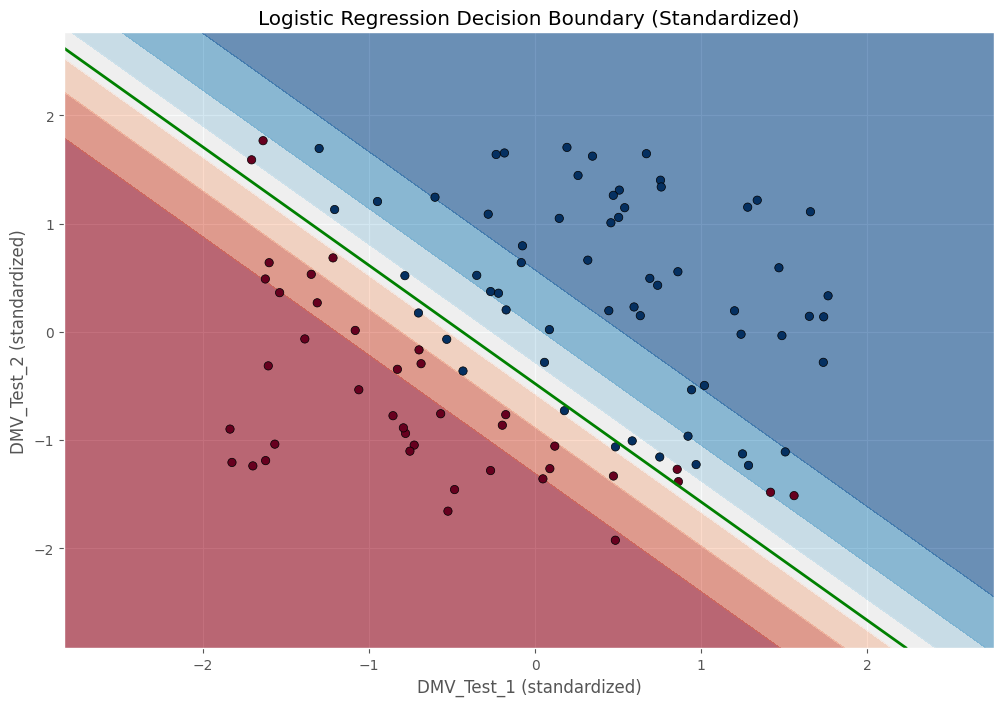

In [ ]:
#Step 1: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Train logistic regression on standardized data
model = LogisticRegression()
model.fit(X_scaled, y)

# Step 3: Create a meshgrid for background shading
x_min, x_max = X_scaled[:,0].min() - 1, X_scaled[:,0].max() + 1
y_min, y_max = X_scaled[:,1].min() - 1, X_scaled[:,1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict probabilities for each point in grid
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
Z = Z.reshape(xx.shape)

# Step 4: Plot shaded background
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.6)

# Step 5: Plot decision boundary (p=0.5 line)
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors="green")

# Step 6: Plot training points
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, edgecolors="k", cmap=plt.cm.RdBu)

# Labels
plt.xlabel("DMV_Test_1 (standardized)")
plt.ylabel("DMV_Test_2 (standardized)")
plt.title("Logistic Regression Decision Boundary (Standardized)")

plt.show()


### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [ ]:
# --- Assuming X and y are already defined ---
# Ensure y is 1D
y = y.ravel()   # works since y is NumPy array

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# θ = coefficients + intercept
theta = np.append(model.intercept_, model.coef_)
print("Optimized θ values:", theta)

# Predictions (probabilities and classes)
y_prob = model.predict_proba(X_test)[:, 1]   # probability of class 1
y_pred = (y_prob >= 0.5).astype(int)

# First 10 outputs
print("\nFirst 10 predicted probabilities (test set):")
print(y_prob[:10])

print("\nFirst 10 predicted classes (test set):")
print(y_pred[:10])

print("\nFirst 10 actual classes (test set):")
print(y_test[:10])

# Accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"\nTrain Accuracy: {train_acc:.4f}")
print(f"Test  Accuracy: {test_acc:.4f}")


Optimized θ values: [-30.20000099   0.25970232   0.22481016]

First 10 predicted probabilities (test set):
[1.23948214e-01 4.72881101e-04 6.35721946e-06 8.81216580e-02
 1.30353258e-03 1.20302613e-02 2.25416984e-03 9.99812912e-01
 9.64045963e-01 2.49062951e-02]

First 10 predicted classes (test set):
[0 0 0 0 0 0 0 1 1 0]

First 10 actual classes (test set):
[1 0 0 0 0 0 0 1 0 0]

Train Accuracy: 0.9125
Test  Accuracy: 0.8000
